# Classiying sounds as either snore or non-snore



### Project Workflow:

![alt text](project_UMP.png "Title")

In [4]:
#Importing all nessecary libraries
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import skimage.io
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import pandas as pd
import time
import random 
import pandas as pd
import numpy as np
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
%matplotlib inline

### Audio Augumentation and MFCC Feature extraction

#### Steps for MFCC Feature extraction:
MFCCs are a compact representation of the spectrum of an audio signal. MFCC takes into account human perception for sensitivity at appropriate frequencies by converting the conventional frequency to Mel Scale, and are thus suitable for speech recognition tasks quite wel.If the coefficient has a positive value, the majority energy is concentrated in the low-frequency regions. On the other hand, if the coefficient has a negative value, it represents that most of the spectral energy is concentrated at high frequencies

**Step1: Frame the signal into short frame**
Audio files are nothing but signals, and change over time. Hence, we don't need to apply the fourier transform across the entire signal.

![alt text](1.png "Title")

**Step2: Windowing**
Windowing is essentially applied to notably counteract the assumption made by the Fast Fourier Transform that the data is infinite and to reduce spectral leakage.
![alt text](2.png "Title")

**Step3: Calculation of the Discrete Fourier Transform**
We can perform Fourier Transform on each frame to calcualte the frequency spectrum called as Short-Time Fourier Transform where NFFT would usually be 256 or 512

**Step4: Applying Filter Banks**
The Mel Spaced filter banks are formally set of 20-40 traingluar filters. Our filterbank comes in the form of 40 vectors of length 257 (assuming the FFT settings fom step 2). Each vector is mostly zeros, but is non-zero for a certain section of the spectrum. To calculate filterbank energies we multiply each filterbank with the power spectrum, then add up the coefficents. Once this is performed we are left with 40 numbers that give us an indication of how much energy was in each filterbank.
![alt text](3.png "Title")
**Step5: Apply the log of these spectogram values to get log filterbank energies which would be our final MFCC Features**



#### Visualizing Log MFCC Features for one Audio file

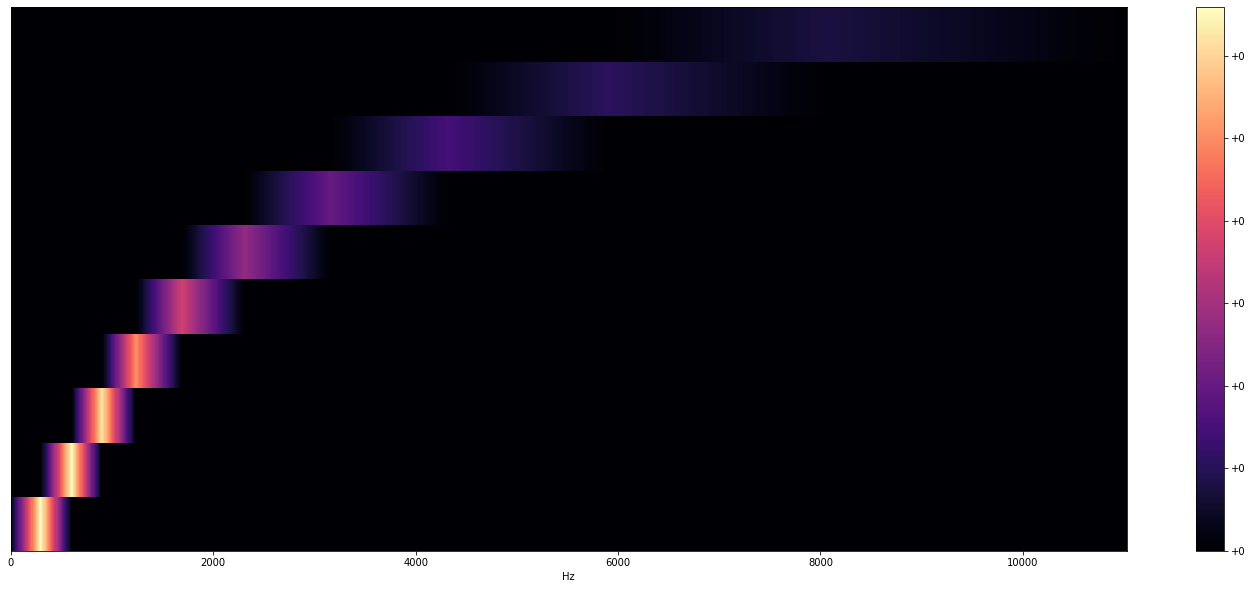

In [9]:
scale_file = "Snoring Dataset/0/0_0.wav"
ipd.Audio(scale_file)
scale,sr = librosa.load(scale_file)
filter_banks = librosa.filters.mel(n_fft=2048,sr=22050,n_mels=10)
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks,sr=sr,x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

#### Extracting MEL Spectogram

C:\Users\gowta\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\gowta\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


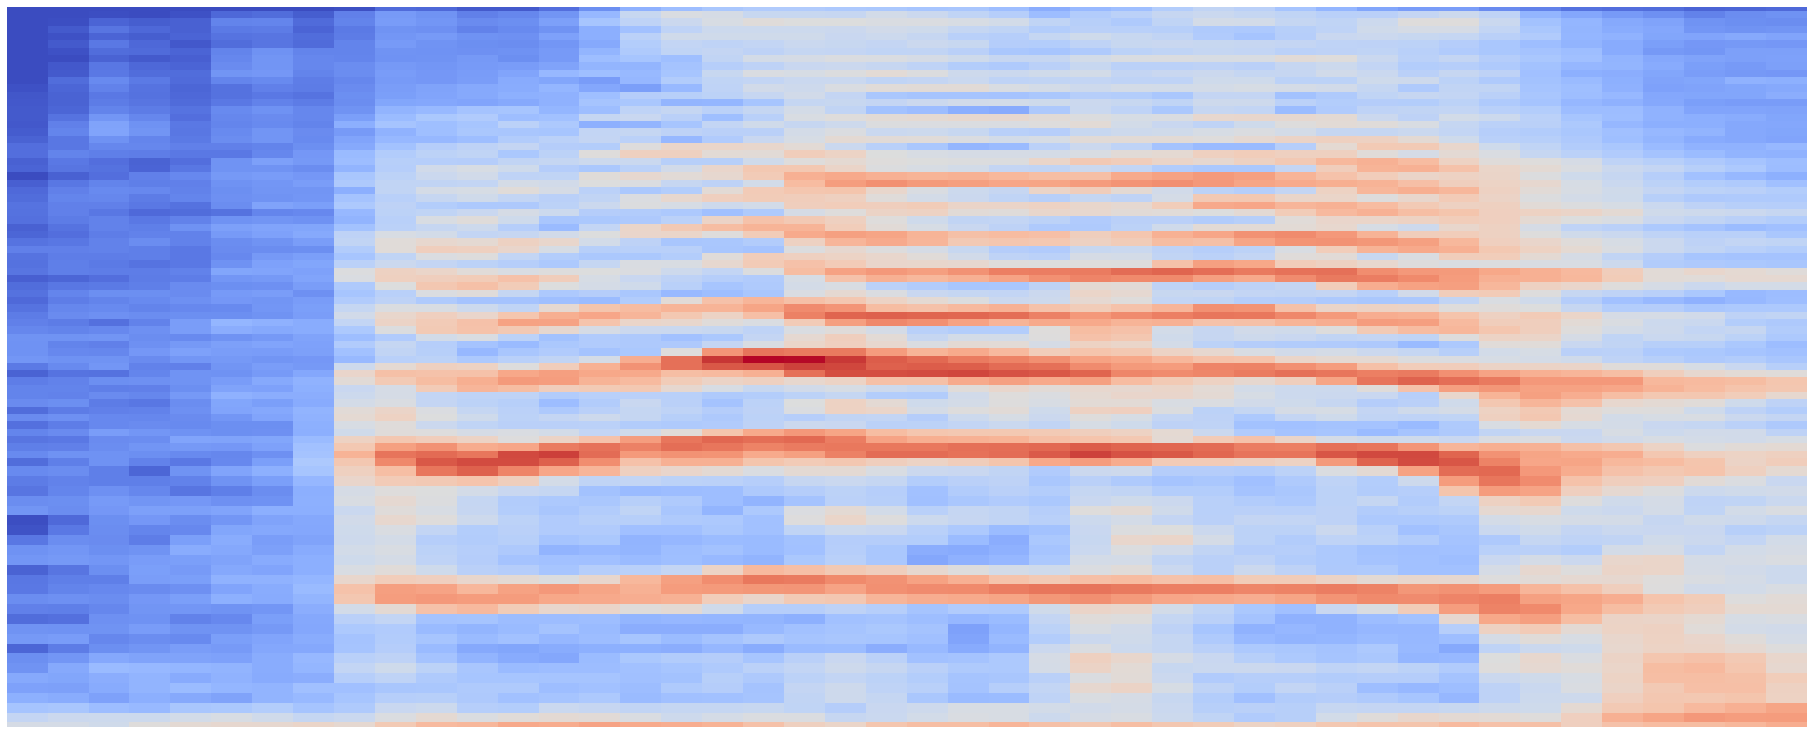

In [11]:
mel_spectrogram = librosa.feature.melspectrogram(scale,sr=sr,n_fft=2048,hop_length=512,n_mels=90)
mel_spectrogram.shape
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
fig = plt.figure(frameon=False)
fig.set_size_inches(25,10)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
librosa.display.specshow(log_mel_spectrogram,sr=sr,x_axis="time",y_axis="mel")

#### Now let us extract the MFCC features by augumenting 1500 new smaples of each class

In [21]:
#Helper Function:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best') ##kaiser_best is being used for high quality for processing(dafult method)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
extracted_features=[]

directory = r'Snoring Dataset/0'
for filename in os.listdir(directory):
    file_name=os.path.join(directory, filename)
    final_class_labels=0
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

directory = r'Snoring Dataset/1'
for filename in os.listdir(directory):
    file_name=os.path.join(directory, filename)
    final_class_labels=1
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()
df = df.append(extracted_features_df,ignore_index=True)

def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_best') ##kaiser_best is being used for high quality for processing(dafult method)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features,sample_rate

In [ ]:
#This is for the augumented MFCC
import random 
import pandas as pd
import numpy as np
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

#df = pd.DataFrame()
for i in range(1500):
    scale_file = "Snoring Dataset/1/1_"+str(random.randint(0,499))+".wav"
    mfcc_features,sr = features_extractor(scale_file)
    #Now apply transformation 
    augment = Compose([
    AddGaussianNoise(min_amplitude=random.uniform(0.001,0.009), max_amplitude=random.uniform(0.11,0.20), p=0.5),
    ])
    augmented_samples = augment(samples=mfcc_features, sample_rate=sr)
    
    #save these augumented sampes to the csv file and then generate the image
    df = df.append({'feature':augmented_samples,'class':1},ignore_index=True)
    
    fig = plt.figure(frameon=False)
    fig.set_size_inches(25,10)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    librosa.display.specshow(augmented_samples,sr=sr,x_axis="time",y_axis="mel")
    fig.savefig('Snoring Dataset/img1_aug_data/1_'+str(i+500)+'.png')
    

In [ ]:
#This is for the augumented MFCC
import random 
import pandas as pd
import numpy as np
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

#df = pd.DataFrame()
for i in range(1500):
    scale_file = "Snoring Dataset/0/0_"+str(random.randint(0,499))+".wav"
    mfcc_features,sr = features_extractor(scale_file)
    #Now apply transformation 
    augment = Compose([
    AddGaussianNoise(min_amplitude=random.uniform(0.001,0.009), max_amplitude=random.uniform(0.11,0.20), p=0.5),
    ])
    augmented_samples = augment(samples=mfcc_features, sample_rate=sr)
    
    #save these augumented sampes to the csv file and then generate the image
    df = df.append({'feature':augmented_samples,'class':0},ignore_index=True)

    fig = plt.figure(frameon=False)
    fig.set_size_inches(25,10)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    librosa.display.specshow(augmented_samples,sr=sr,x_axis="time",y_axis="mel")
    fig.savefig('Snoring Dataset/img0_aug_data/0_'+str(i+500)+'.png')


#### Now we have 2000 samples of MFCC feature and Mel Spectograms for each class

#### Checking the MFCC Extracted features

In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from ast import literal_eval
import re

df = pd.read_csv('final123.csv')
df['feature'] = df['feature'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df

C:\Users\gowta\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  del sys.path[0]


,feature,class
0,"[-273.59439, 37.990738, -44.862053, 10.942469,...",0
1,"[-222.55693, -33.52792, -42.325127, 39.808823,...",0
2,"[-271.64816, -28.612263, -71.13217, 18.959768,...",0
3,"[-433.7594, 148.05132, 26.447033, 11.703525, 1...",0
4,"[-393.4787, 193.68898, 52.493458, 21.392962, 1...",0
...,...,...
3995,"[-116.46711, 148.92365, -12.136892, 19.705294,...",1
3996,"[-95.43281, 151.15962, -27.16566, 16.91375, 9....",1
3997,"[-51.322052, 80.80671, 44.926388, 13.566206, -...",1
3998,"[-163.02095, 57.448708, -16.009138, -7.5899806...",1


In [30]:
import numpy as np
from sklearn.decomposition import PCA
from ast import literal_eval
import re

df = pd.read_csv('mfcc_final.csv')
df['feature'] = df['feature'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df

,feature,class
0,"[-273.59439, 37.990738, -44.862053, 10.942469,...",0
1,"[-222.55693, -33.52792, -42.325127, 39.808823,...",0
2,"[-271.64816, -28.612263, -71.13217, 18.959768,...",0
3,"[-433.7594, 148.05132, 26.447033, 11.703525, 1...",0
4,"[-393.4787, 193.68898, 52.493458, 21.392962, 1...",0
...,...,...
3995,"[-248.15479, 101.50485, -35.80549, 14.564691, ...",1
3996,"[-331.41656, 96.51286, -14.80759, 41.55244, 8....",1
3997,"[-215.89328, 99.73702, 47.3192, 8.928192, 15.2...",1
3998,"[-174.68011, 64.57523, 29.726002, 7.9560785, -...",1


#### Applying TSNE to visualize the data in the 2-d

<AxesSubplot:xlabel='1st component', ylabel='2nd component'>

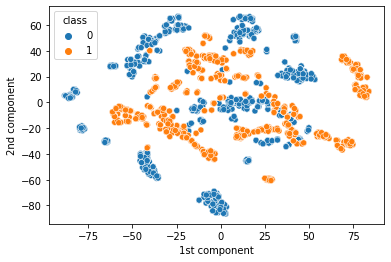

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0,perplexity=40)
tsne_obj= tsne.fit_transform(list(df['feature'].values[:4000]))
tsne_df = pd.DataFrame({'1st component':tsne_obj[:,0],
                        '2nd component':tsne_obj[:,1],
                        'class':df['class'].values[:4000]})
import seaborn as sns
sns.scatterplot(x="1st component", y="2nd component",hue="class",
              data=tsne_df)


#### Let us now apply PCA to get lower dimensional features

In [32]:
df = pd.DataFrame(df["feature"].to_list(), columns=['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'])

In [37]:
pca = PCA(n_components=5)
pca.fit(df)

PCA(n_components=5)

In [38]:
features = (pca.transform(df))
y = np.cumsum(pca.explained_variance_ratio_)
print(y)
pca.components_

[0.75358331 0.86983445 0.92460088 0.94073771 0.95317162]


array([[-9.93918269e-01, -9.73467493e-02,  3.40661247e-02,
         2.12047534e-04,  4.23621956e-03, -1.37420377e-02,
         1.74147810e-02,  1.32634539e-02, -2.97899303e-03,
        -8.44967607e-03,  1.60390831e-02, -4.68313924e-03,
         6.59940243e-03,  1.15276910e-02,  8.73846251e-03,
         2.24329254e-03,  8.34080646e-03,  3.00207915e-03,
         8.56089880e-03,  5.86486468e-03],
       [ 9.51006423e-02, -9.58352747e-01, -8.12096149e-02,
        -7.18898100e-02, -1.75064583e-01, -9.86849154e-02,
         7.35877956e-02,  3.67293843e-02, -1.77851063e-02,
        -2.56234769e-02, -4.45664954e-05,  8.00032141e-03,
         7.82758921e-04,  9.05002541e-02,  4.12322140e-02,
         2.65525271e-02, -1.45388587e-02,  1.31210748e-02,
        -2.16591834e-02,  3.34158683e-02],
       [-3.91603551e-02,  1.55997943e-01, -9.05523365e-01,
        -1.11095689e-01, -2.19050335e-01, -1.42374961e-01,
         4.07773527e-03,  6.17994751e-02, -1.66398595e-01,
        -4.20679380e-02,  1.0

In [67]:
import numpy as np
from sklearn.decomposition import PCA
from ast import literal_eval
import re
import pandas as pd

df = pd.read_csv('mfcc_final.csv')
df['feature'] = df['feature'].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [52]:
for i in range(len(df)):
    df['feature'][i] = features[i]

C:\Users\gowta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Now let us train the CNN on the lower-dim features 

In [68]:
import pandas as pd
import numpy as np

### Split the dataset into independent and dependent dataset
X=np.array(list(df['feature'].values[:4000]))
y=np.array(list(df['class'].values[:4000]))

In [69]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [70]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0,stratify=y)

In [4]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [70]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(20,5)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [71]:
from keras import optimizers
optimizer = optimizers.Adam(clipvalue=0.9)
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=optimizer)

In [72]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint

num_epochs = 300
num_batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
time_start = time.time()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


Epoch 1/300
120/120 [==============================] - 1s 4ms/step - loss: 4.7882 - accuracy: 0.5550 - val_loss: 0.5394 - val_accuracy: 0.7456

Epoch 00001: val_loss improved from inf to 0.53938, saving model to saved_models\audio_classification.hdf5
Epoch 2/300
120/120 [==============================] - 0s 3ms/step - loss: 1.6186 - accuracy: 0.6012 - val_loss: 0.5444 - val_accuracy: 0.7212

Epoch 00002: val_loss did not improve from 0.53938
Epoch 3/300
120/120 [==============================] - 0s 3ms/step - loss: 0.9353 - accuracy: 0.6420 - val_loss: 0.5578 - val_accuracy: 0.7244

Epoch 00003: val_loss did not improve from 0.53938
Epoch 4/300
120/120 [==============================] - 0s 2ms/step - loss: 0.7727 - accuracy: 0.6435 - val_loss: 0.5493 - val_accuracy: 0.7900

Epoch 00004: val_loss did not improve from 0.53938
Epoch 5/300
120/120 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6615 - val_loss: 0.5218 - val_accuracy: 0.7969

Epoch 00005: val_los

120/120 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8927 - val_loss: 0.1737 - val_accuracy: 0.9350

Epoch 00031: val_loss improved from 0.17966 to 0.17366, saving model to saved_models\audio_classification.hdf5
Epoch 32/300
120/120 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.8930 - val_loss: 0.1835 - val_accuracy: 0.9325

Epoch 00032: val_loss did not improve from 0.17366
Epoch 33/300
120/120 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9089 - val_loss: 0.1717 - val_accuracy: 0.9362

Epoch 00033: val_loss improved from 0.17366 to 0.17175, saving model to saved_models\audio_classification.hdf5
Epoch 34/300
120/120 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9086 - val_loss: 0.1708 - val_accuracy: 0.9425

Epoch 00034: val_loss improved from 0.17175 to 0.17078, saving model to saved_models\audio_classification.hdf5
Epoch 35/300
120/120 [===========================

120/120 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9497 - val_loss: 0.0945 - val_accuracy: 0.9619

Epoch 00106: val_loss did not improve from 0.09032
Epoch 107/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9501 - val_loss: 0.0997 - val_accuracy: 0.9650

Epoch 00107: val_loss did not improve from 0.09032
Epoch 108/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9600 - val_loss: 0.0911 - val_accuracy: 0.9694

Epoch 00108: val_loss did not improve from 0.09032
Epoch 109/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9521 - val_loss: 0.0892 - val_accuracy: 0.9694

Epoch 00109: val_loss improved from 0.09032 to 0.08917, saving model to saved_models\audio_classification.hdf5
Epoch 110/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9541 - val_loss: 0.0851 - val_accuracy: 0.9669

Epoch 00110: val_los

120/120 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9699 - val_loss: 0.0733 - val_accuracy: 0.9737

Epoch 00186: val_loss did not improve from 0.06621
Epoch 187/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9616 - val_loss: 0.0670 - val_accuracy: 0.9787

Epoch 00187: val_loss did not improve from 0.06621
Epoch 188/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0973 - accuracy: 0.9663 - val_loss: 0.0669 - val_accuracy: 0.9744

Epoch 00188: val_loss did not improve from 0.06621
Epoch 189/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9702 - val_loss: 0.0750 - val_accuracy: 0.9688

Epoch 00189: val_loss did not improve from 0.06621
Epoch 190/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9633 - val_loss: 0.0727 - val_accuracy: 0.9731

Epoch 00190: val_loss did not improve from 0.06621
Epoch 191/300
120/120 [======

120/120 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9729 - val_loss: 0.0610 - val_accuracy: 0.9756

Epoch 00266: val_loss did not improve from 0.05581
Epoch 267/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9687 - val_loss: 0.0642 - val_accuracy: 0.9769

Epoch 00267: val_loss did not improve from 0.05581
Epoch 268/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9684 - val_loss: 0.0616 - val_accuracy: 0.9744

Epoch 00268: val_loss did not improve from 0.05581
Epoch 269/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0877 - accuracy: 0.9665 - val_loss: 0.0602 - val_accuracy: 0.9762

Epoch 00269: val_loss did not improve from 0.05581
Epoch 270/300
120/120 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9575 - val_loss: 0.0596 - val_accuracy: 0.9762

Epoch 00270: val_loss did not improve from 0.05581
Epoch 271/300
120/120 [======

In [73]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=8)
print("test loss, test acc:", results)

Evaluate on test data
200/200 [==============================] - 0s 960us/step - loss: 0.0586 - accuracy: 0.9775
test loss, test acc: [0.058627061545848846, 0.9775000214576721]


#### Applying SVM with radial kernal 

In [115]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.893125


## MEL Spectogram classification using CNN 

The fast Fourier transform is a powerful tool that allows us to analyze the frequency content of a signal. For audio signals such as music and speech signal's frequncy content varies over time.We can apply short-time Fourier transform and the FFT is computed on overlapping windowed segments of the signal which generates the spectogram


![alt text](4.png "Title")


We can think of spectogram as a bunch of FFTs stacked on top of each other. It is a way to visually represent a signal's loudness, or amplitude.

However, humans can't perceive frequinces on a linear scale. We are better at detecting differences in lower frequncies than higher frequencies. Hence we use mel scale which is a unit of pitch such that equa distances in pitch sounded equally. 

A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale


In [101]:
# Directory with our training dandelion pictures
train_0_dir = os.path.join('Snoring Dataset/all/train/0')

# Directory with our training grass pictures
train_1_dir = os.path.join('Snoring Dataset/all/train/1')

# Directory with our validation dandelion pictures
valid_0_dir = os.path.join('Snoring Dataset/all/val/0')

# Directory with our validation grass pictures
valid_1_dir = os.path.join('Snoring Dataset/all/val/1')

In [102]:
train_0_names = os.listdir(train_0_dir)
print(train_0_names[:10])


train_1_names = os.listdir(train_1_dir)
print(train_1_names[:10])

valid_0_names = os.listdir(valid_0_dir)
print(valid_0_names[:10])

valid_1_names = os.listdir(valid_1_dir)
print(valid_1_names[:10])

['0_0.png', '0_1.png', '0_10.png', '0_100.png', '0_1000.png', '0_1001.png', '0_1002.png', '0_1003.png', '0_1004.png', '0_1005.png']
['1_0.png', '1_1.png', '1_10.png', '1_100.png', '1_1000.png', '1_1001.png', '1_1002.png', '1_1003.png', '1_1004.png', '1_1005.png']
['0_1500.png', '0_1501.png', '0_1502.png', '0_1503.png', '0_1504.png', '0_1505.png', '0_1506.png', '0_1507.png', '0_1508.png', '0_1509.png']
['1_1500.png', '1_1501.png', '1_1502.png', '1_1503.png', '1_1504.png', '1_1505.png', '1_1506.png', '1_1507.png', '1_1508.png', '1_1509.png']


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Snoring Dataset/all/train',  # This is the source directory for training images
        classes = ['0', '1'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'Snoring Dataset/all/val',  # This is the source directory for training images
        classes = ['0', '1'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [104]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
tf.keras.layers.Dense(1, activation='sigmoid')])

In [105]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 64)       

In [106]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [107]:
history = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 22s 3s/step - loss: 0.7029 - accuracy: 0.5080 - val_loss: 0.6857 - val_accuracy: 0.6250
Epoch 2/15
8/8 [==============================] - 21s 3s/step - loss: 0.6921 - accuracy: 0.5381 - val_loss: 0.7074 - val_accuracy: 0.1908
Epoch 3/15
8/8 [==============================] - 22s 3s/step - loss: 0.6844 - accuracy: 0.5737 - val_loss: 0.6491 - val_accuracy: 0.6842
Epoch 4/15
8/8 [==============================] - 21s 3s/step - loss: 0.6697 - accuracy: 0.5913 - val_loss: 0.7890 - val_accuracy: 0.2434
Epoch 5/15
8/8 [==============================] - 23s 3s/step - loss: 0.6433 - accuracy: 0.6243 - val_loss: 0.6627 - val_accuracy: 0.5526
Epoch 6/15
8/8 [==============================] - 25s 3s/step - loss: 0.5711 - accuracy: 0.7051 - val_loss: 0.3111 - val_accuracy: 0.8816
Epoch 7/15
8/8 [==============================] - 25s 3s/step - loss: 0.5474 - accuracy: 0.7248 - val_loss: 0.3471 - val_accuracy: 0.9408
Epoch 8/15
8/8 [==================

In [108]:
model.evaluate(validation_generator)

53/53 [==============================] - 13s 246ms/step - loss: 0.0813 - accuracy: 0.9730


[0.0813216045498848, 0.9729999899864197]

In [109]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

53/53 [==============================] - 15s 282ms/step


In [111]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)

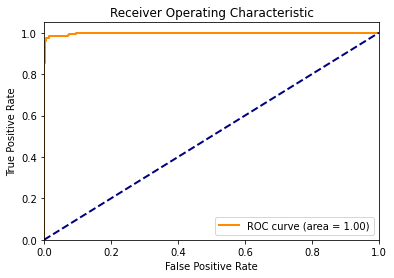

In [112]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Using Trasnfer-learning technique - VGG19 on spectogram dataset

In [1]:
from tensorflow.keras.applications import vgg16
image_size = 32
# Init the VGG model 
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

In [2]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001DA0D963B88> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001DA104916C8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001DA10505BC8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001DA10594E08> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001DA1059B848> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001DA105A3408> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001DA105A5AC8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001DA105AD808> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001DA105B3D08> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001DA105B6188> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001DA105A5548> False
<tensorflow.python.

In [5]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 15,241,025
Trainable params: 526,337
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 15,241,025
Trainable params: 526,337
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Snoring Dataset/all/train',  # This is the source directory for training images
        classes = ['0', '1'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'Snoring Dataset/all/val',  # This is the source directory for training images
        classes = ['0', '1'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# Configure the model for training
from keras import optimizers
optimizer = optimizers.Adam(clipvalue=0.9)
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=optimizer)

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=
         train_generator.samples/train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=
         validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/20


InvalidArgumentError:  Incompatible shapes: [4320,1] vs. [120,1]
	 [[node gradient_tape/binary_crossentropy/logistic_loss/mul/BroadcastGradientArgs (defined at <ipython-input-9-d41dc13937e7>:15) ]] [Op:__inference_train_function_1517]

Function call stack:
train_function


In [82]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Snoring Dataset/all/train',  # This is the source directory for training images
        classes = ['0', '1'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'Snoring Dataset/all/val',  # This is the source directory for training images
        classes = ['0', '1'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [83]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='sigmoid')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [84]:
BATCH_SIZE=64
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=2

n_steps = train_generator.samples // BATCH_SIZE
n_val_steps = validation_generator.samples // BATCH_SIZE
n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [85]:
vgg_history = vgg_model.fit(train_generator,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=validation_generator,
                            steps_per_epoch=n_steps,
                            validation_steps=n_val_steps,
                            verbose=1)

Epoch 1/50


ValueError: in user code:

    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\gowta\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:174 sigmoid_cross_entropy_with_logits
        (logits.get_shape(), labels.get_shape()))

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))


In [24]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 50
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(),
              metrics=['accuracy'])

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [25]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Snoring Dataset/vgg/train',  # This is the source directory for training images
        classes = ['0', '1'],
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'Snoring Dataset/vgg/val',  # This is the source directory for training images
        classes = ['0', '1'],
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 882 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [26]:
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

Epoch 1/50
8/8 [==============================] - 192s 24s/step - loss: 0.7308 - accuracy: 0.5292 - val_loss: 0.6675 - val_accuracy: 0.7542
Epoch 2/50
8/8 [==============================] - 217s 27s/step - loss: 0.5878 - accuracy: 0.6973 - val_loss: 0.6724 - val_accuracy: 0.5593
Epoch 3/50
8/8 [==============================] - 214s 27s/step - loss: 0.4396 - accuracy: 0.8612 - val_loss: 0.6748 - val_accuracy: 0.7119
Epoch 4/50
8/8 [==============================] - 213s 27s/step - loss: 0.3584 - accuracy: 0.8778 - val_loss: 0.7087 - val_accuracy: 0.5169
Epoch 5/50
8/8 [==============================] - 213s 27s/step - loss: 0.2881 - accuracy: 0.8951 - val_loss: 0.7046 - val_accuracy: 0.5254
Epoch 6/50
8/8 [==============================] - 217s 27s/step - loss: 0.3098 - accuracy: 0.8735 - val_loss: 0.7260 - val_accuracy: 0.7203
Epoch 7/50
8/8 [==============================] - 216s 30s/step - loss: 0.1950 - accuracy: 0.9362 - val_loss: 0.6751 - val_accuracy: 0.6780
Epoch 8/50
8/8 [====

KeyboardInterrupt: 